<a href="https://colab.research.google.com/github/Samgomes2510/Projeto_arvore_decisao/blob/main/Projeto_Credit_Score_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto de Credit Score - Naive Bayes**


Nessa aula aplicaremos o algoritmo de naive bayes afim de tentarmos trazer previs√µes do score de cr√©dito.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay

# **1) Comece carregando as bases de treino (X e y) e teste (X e y).**
Verifique se o n√∫mero de linhas condiz, se as vari√°veis est√£o corretas sendo apenas a de score para y e as demais nas bases de X e por √∫ltimo, se Y est√° balanceada no teste.


In [ ]:
X_test = pd.read_csv("x_test.csv", delimiter=',')
X_train = pd.read_csv("x_train_balanced.csv", delimiter=',')
y_train = pd.read_csv("y_train_balanced.csv", delimiter=',')
y_test = pd.read_csv("y_test.csv", delimiter=',')

In [ ]:
X_test

Credit_Score  Idade  Tempo_Credito    Balanco  Qtd_Produtos  \
0               686   36.0              3   95848.58             2   
1               703   35.0              1       0.00             1   
2               730   26.0              6       0.00             1   
3               675   33.0              6       0.00             2   
4               754   24.0              3  121513.31             2   
...             ...    ...            ...        ...           ...   
24922           786   37.0              4       0.00             2   
24923           592   35.0              7  122724.50             1   
24924           645   45.0              7  121286.32             1   
24925           567   47.0              1  126447.40             1   
24926           725   32.0              1       0.00             2   

       Possui_Cartao  Membro_Ativo  Salario_Anual  Genero_Encoder  \
0                0.0           1.0      7144694.0               1   
1                1.0           1.0     14136462.0               1   
2                1.0           1.0      1011687.0               1   
3                0.0           1.0      1011687.0               0   
4                0.0           1.0      1011687.0               0   
...              ...           ...            ...             ...   
24922            0.0           1.0      1011687.0               0   
24923            1.0           1.0     17773874.0               1   
24924            1.0           1.0       869372.0               1   
24925            1.0           0.0      1011687.0               0   
24926            1.0           1.0      1011687.0               1   

       Pais_GERMANY  Pais_SPAIN  
0             False       False  
1             False       False  
2             False        True  
3             False       False  
4              True       False  
...             ...         ...  
24922         False        True  
24923         False       False  
24924         False       False  
24925          True       False  
24926         False        True  

[24927 rows x 11 columns]

In [ ]:
y_test

Churn
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
...      ...
24922    0.0
24923    0.0
24924    0.0
24925    1.0
24926    0.0

[24927 rows x 1 columns]

In [ ]:
y_train

Churn
0         1.0
1         0.0
2         1.0
3         1.0
4         1.0
...       ...
117945    1.0
117946    1.0
117947    1.0
117948    1.0
117949    1.0

[117950 rows x 1 columns]

In [ ]:
X_train

Credit_Score      Idade  Tempo_Credito        Balanco  Qtd_Produtos  \
0                711  35.000000             10       0.000000             2   
1                619  33.000000              7       0.000000             2   
2                841  54.000000              4  102721.490000             1   
3                679  48.000000              6  125161.240000             1   
4                656  42.000000              6       0.000000             3   
...              ...        ...            ...            ...           ...   
117945           529  43.000000              7       0.000000             1   
117946           639  44.450575              7       0.000000             1   
117947           541  49.890057              6  102744.063633             1   
117948           593  37.911470              5  139949.785268             1   
117949           733  28.402776              0       0.000000             3   

        Possui_Cartao  Membro_Ativo  Salario_Anual  Genero_Encoder  \
0            1.000000      0.000000      5331178.0               1   
1            0.000000      1.000000      1011687.0               1   
2            1.000000      1.000000      1011687.0               1   
3            1.000000      0.000000       579659.0               1   
4            0.000000      0.000000     14233155.0               0   
...               ...           ...            ...             ...   
117945       0.514157      0.000000      1011687.0               1   
117946       1.000000      0.725287      1011687.0               0   
117947       1.000000      0.000000      1011687.0               0   
117948       1.000000      0.000000      1011687.0               0   
117949       0.000000      0.000000      1011687.0               0   

        Pais_GERMANY  Pais_SPAIN  
0              False       False  
1              False       False  
2               True       False  
3              False       False  
4              False       False  
...              ...         ...  
117945         False        True  
117946         False        True  
117947          True       False  
117948          True       False  
117949         False       False  

[117950 rows x 11 columns]

# **2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.**


In [ ]:
modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)

GaussianNB()

# **3) Fa√ßa a avalia√ß√£o do modelo com os dados de treinamento.**
Traga a acur√°cia, recall e plote a matriz de confus√£o. N√£o se esque√ßa de avaliar com suas palavras o desempenho do modelo, interpretando as m√©tricas.


In [ ]:
# Calcular a acur√°cia
accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test, average='macro')

print("Acur√°cia:", accuracy)
print("Recall:", recall)

Acur√°cia: 0.555261363180487
Recall: 0.5891652479800337


‚úÖ Acur√°cia - Treino: 0.59
üîÅ Recall (macro) - Treino: 0.59


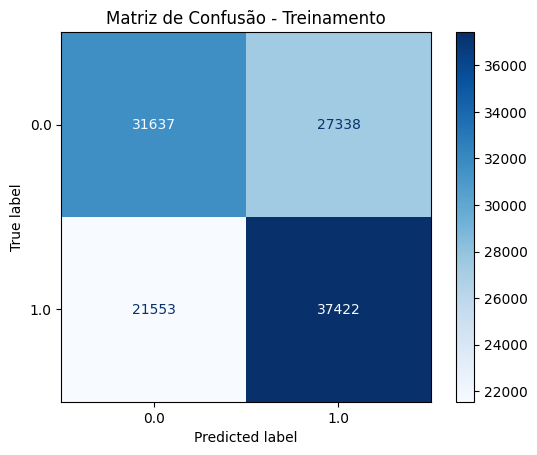

In [ ]:
# Avalia√ß√£o com dados de treino
y_pred_train = modelo_nb.predict(X_train)

# Calcular a acur√°cia
acc_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train, average='macro')
print(f"‚úÖ Acur√°cia - Treino: {acc_train:.2f}")
print(f"üîÅ Recall (macro) - Treino: {recall_train:.2f}")

# Matriz de Confus√£o - Treino
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=np.unique(y_train))
disp_train.plot(cmap='Blues')
plt.title("Matriz de Confus√£o - Treinamento")
plt.show()


‚úÖ Insight:

üü° 1. Desempenho Fraco, mas n√£o aleat√≥rio

Um modelo aleat√≥rio com v√°rias classes poderia ter um desempenho muito abaixo de 59%.

Isso sugere que o modelo est√° aprendendo algum padr√£o, mas n√£o o suficiente para ser confi√°vel em produ√ß√£o.

üîÑ 2. Modelo pode estar sofrendo com ru√≠do ou dados insuficientes

√â poss√≠vel que as vari√°veis preditoras n√£o tenham rela√ß√£o forte com o score.

Pode haver dados ruidosos, desequil√≠brio residual ou falta de transforma√ß√£o adequada das vari√°veis.

‚öñÔ∏è 3. Baixa capacidade de generaliza√ß√£o

Mesmo na base de treino, o modelo n√£o performa bem. Ou seja, n√£o √© overfitting, e sim underfitting: o modelo √© simples demais (como o Naive Bayes costuma ser), e n√£o est√° captando bem os padr√µes dos dados.

# 4) Aplique o modelo aos dados de teste e realize a avalia√ß√£o dos resultados, da mesma forma que fez acima. N√£o se esque√ßa de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.


‚úÖ Acur√°cia - Teste: 0.56
üîÅ Recall (macro) - Teste: 0.59


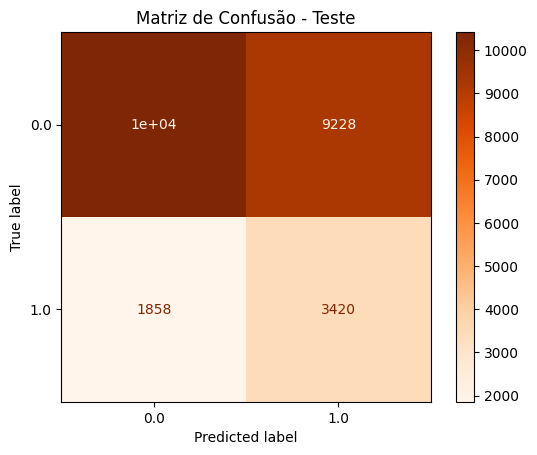

In [ ]:
# Avalia√ß√£o com dados de teste
y_pred_test = modelo_nb.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='macro')
print(f"‚úÖ Acur√°cia - Teste: {acc_test:.2f}")
print(f"üîÅ Recall (macro) - Teste: {recall_test:.2f}")

# Matriz de Confus√£o - Teste
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.unique(y_test))
disp_test.plot(cmap='Oranges')
plt.title("Matriz de Confus√£o - Teste")
plt.show()


üìå Principais Insights:

üî∏ Modelo est√°vel, mas fraco

A proximidade das m√©tricas indica estabilidade, mas os valores abaixo de 60% apontam que o modelo n√£o consegue capturar bem os padr√µes dos dados.

üî∏ Naive Bayes pode estar limitado

√â um modelo simples, com hip√≥teses fortes (como independ√™ncia entre atributos), o que pode n√£o refletir a realidade dos dados de cr√©dito, que geralmente envolvem rela√ß√µes mais complexas.

üî∏ Bom ponto de partida

Apesar dos resultados fracos, o Naive Bayes serve como baseline (modelo de refer√™ncia). Modelos mais robustos provavelmente ir√£o performar melhor.


üìà Conclus√£o:

O modelo Naive Bayes apresentou desempenho semelhante em treino e teste, o que √© bom em termos de estabilidade. No entanto, a acur√°cia e o recall relativamente baixos sugerem que ele n√£o √© o modelo ideal para previs√µes confi√°veis de score de cr√©dito.


# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de cr√©dito.
Utilize pelo menos 4 linhas.

Neste projeto, aplicamos o algoritmo Naive Bayes para prever o score de cr√©dito de clientes com base em vari√°veis previamente tratadas e preparadas. Realizamos o pr√©-processamento, incluindo o balanceamento das classes, transforma√ß√£o de vari√°veis categ√≥ricas e divis√£o da base em treino e teste. O objetivo principal foi verificar se o modelo √© capaz de classificar corretamente os perfis de cr√©dito utilizando um algoritmo probabil√≠stico simples. Embora o desempenho tenha sido modesto, a aplica√ß√£o serviu como uma linha de base (baseline) para futuras compara√ß√µes com modelos mais complexos.